In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## **TRAIN**

In [4]:
df_desconhecidos = pd.read_csv("faces_desconhecidos.csv")
df_conhecidos = pd.read_csv("faces.csv")

df = pd.concat([df_desconhecidos, df_conhecidos])
print(df)

            0         1         2  ...       126       127         target
0   -0.028100  1.874009  0.975083  ...  0.117519  0.773804  desconhecidos
1    0.281798  0.222542 -0.637775  ...  0.022662 -1.110150  desconhecidos
2   -0.469598 -0.438383  1.035088  ... -0.284382  1.243302  desconhecidos
3   -0.019212  0.063674  0.368226  ... -2.261591 -1.204839  desconhecidos
4    0.792076 -1.098803 -1.363440  ... -0.437672  0.653635  desconhecidos
..        ...       ...       ...  ...       ...       ...            ...
274  0.434054 -0.002696  0.212229  ... -1.649907  0.687782         nikoru
275  0.270181  0.033768 -0.644710  ...  0.135071 -0.412404         nikoru
276 -0.092646 -0.497026  0.207429  ...  0.232323 -0.507802         nikoru
277 -0.252063  0.123612  0.047183  ...  0.460267 -0.891587         nikoru
278  0.108067  0.052588 -0.275684  ...  0.393836 -0.162433         nikoru

[29312 rows x 129 columns]


In [5]:
X = np.array(df.drop("target", axis=1))
y = np.array(df.target)
print(X)
print("O y é: ")
print(y)
print(X.shape)
print(y.shape)

[[-0.02810006  1.874009    0.9750827  ...  0.44154063  0.11751907
   0.7738039 ]
 [ 0.28179818  0.22254208 -0.63777477 ... -0.57853884  0.02266233
  -1.1101495 ]
 [-0.4695979  -0.4383834   1.0350882  ...  1.7568198  -0.28438193
   1.2433019 ]
 ...
 [-0.09264576 -0.49702612  0.20742887 ... -0.79943746  0.23232256
  -0.5078017 ]
 [-0.25206274  0.12361234  0.04718345 ... -0.35172102  0.4602672
  -0.8915868 ]
 [ 0.10806715  0.05258779 -0.2756843  ... -0.3100665   0.39383587
  -0.16243276]]
O y é: 
['desconhecidos' 'desconhecidos' 'desconhecidos' ... 'nikoru' 'nikoru'
 'nikoru']
(29312, 128)
(29312,)


## **MISTURANDO TUDO**

In [6]:
from sklearn.utils import shuffle

X, y = shuffle(X, y, random_state=0)

## **SPLIT DATASET**

In [7]:
from sklearn.model_selection import train_test_split

trainX, valX, trainY, valY = train_test_split(X, y, test_size=0.20, random_state=42)

## **NORMALIZANDO**

In [8]:
from sklearn.preprocessing import Normalizer

norm = Normalizer(norm="l2")
trainX = norm.transform(trainX)
valX = norm.transform(valX)

## **TRATANDO LABELS**

In [9]:
from sklearn.preprocessing import LabelEncoder

np.unique(trainY)
classes = len(np.unique(trainY))
classes

3

## **DISCRETIZANDO**

In [10]:
# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(trainY)
trainY = out_encoder.transform(trainY)
np.unique(trainY)

array([0, 1, 2])

In [11]:
# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(valY)
valY = out_encoder.transform(valY)
np.unique(valY)

array([0, 1, 2])

## **USANDO O KERAS**

In [12]:
from tensorflow.keras.utils import to_categorical
trainY = to_categorical(trainY)
valY = to_categorical(valY)
print(valY[0])
print(trainY[0])

[0. 1. 0.]
[0. 1. 0.]


In [13]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(128,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 387       
Total params: 16,899
Trainable params: 16,899
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [15]:
batch_size=8
epochs= 40

history = model.fit(trainX, trainY,  
                    epochs=epochs, 
                    validation_data = (valX,valY), 
                    batch_size=batch_size)

Epoch 1/40
2932/2932 [==============================] - 4s 1ms/step - loss: 0.0448 - accuracy: 0.9907 - val_loss: 0.0076 - val_accuracy: 0.9983
Epoch 2/40
2932/2932 [==============================] - 3s 1ms/step - loss: 0.0089 - accuracy: 0.9974 - val_loss: 0.0038 - val_accuracy: 0.9991
Epoch 3/40
2932/2932 [==============================] - 3s 1ms/step - loss: 0.0058 - accuracy: 0.9984 - val_loss: 0.0028 - val_accuracy: 0.9997
Epoch 4/40
2932/2932 [==============================] - 3s 1ms/step - loss: 0.0039 - accuracy: 0.9990 - val_loss: 0.0020 - val_accuracy: 0.9993
Epoch 5/40
2932/2932 [==============================] - 3s 1ms/step - loss: 0.0032 - accuracy: 0.9989 - val_loss: 0.0016 - val_accuracy: 0.9997
Epoch 6/40
2932/2932 [==============================] - 3s 1ms/step - loss: 0.0025 - accuracy: 0.9989 - val_loss: 0.0016 - val_accuracy: 0.9995
Epoch 7/40
2932/2932 [==============================] - 3s 1ms/step - loss: 0.0018 - accuracy: 0.9993 - val_loss: 0.0014 - val_accuracy:

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

KeyError: ignored

In [18]:
yhat_val = model.predict(valX)
valY = np.argmax(valY,axis = 1)
yhat_val = np.argmax(yhat_val,axis = 1)

print(valY[0])
print(yhat_val[0])

1
1


In [19]:
from sklearn.metrics import confusion_matrix

def print_confusion_matrix(model_name, valY, yhat_val):
        
    cm = confusion_matrix(valY, yhat_val)
    total = sum(sum(cm))
    acc = (cm[0, 0] + cm[1, 1]) / total
    sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    
    print("MODELO : {}".format(model_name))
    print("Acurácia: {:.4f}".format(acc))
    print("Sensitividade: {:.4f}".format(sensitivity))
    print("Especificidade: {:.4f}".format(specificity))

    from mlxtend.plotting import plot_confusion_matrix
    fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
    plt.show()

MODELO : KERAS
Acurácia: 0.9956
Sensitividade: 1.0000
Especificidade: 1.0000


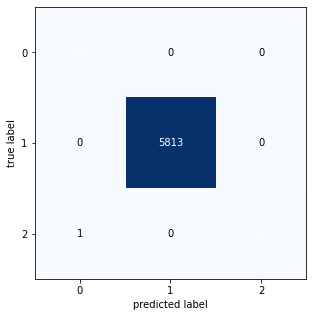

In [20]:
print_confusion_matrix("KERAS", valY, yhat_val)

## **SALVANDO O MODELO**

In [21]:
model.save("faces_d.h5")